In [56]:
%pylab qt
%matplotlib inline

from scipy.integrate import odeint
from scipy.fftpack import fft as fft
import matplotlib.mlab as mlab


def make_fft(x,y):
    N = len(x)
    T = x[1]-x[0]
    yf = fft(y)
    xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
    return xf, 2.0/N * np.abs(yf[0:N//2])

Populating the interactive namespace from numpy and matplotlib


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['fft', 'f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


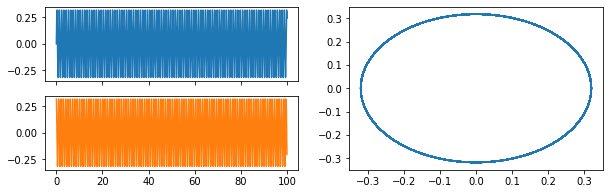

In [60]:
a  = -1*(2*np.pi)**2     # g/l dans le cas du pendule
f  = -0*10e-1  # frottements
CI = [0, 2]

t = np.linspace(0, 100,10000)

def equation(Y,temps):                  # L'équation différentielle sous forme de fonction
    (y,dy)=Y                            # On décompose notre Y en (y,dy)
    return [dy,a*sin(y)+f*dy]           # On renvoie ce que vaut Y'

Y, dY = odeint(equation, CI, t).T # Pour que odeint renvoit séparément les valeurs de Y et de Y',
                                  # il faut rajouter .T à la fin

plt.figure(figsize=(10,3))
sps = (2,2)
ax1 = plt.subplot2grid(sps, (0,0))
ax1.plot(t, Y)
ax1.set_xticklabels([])
ax1 = plt.subplot2grid(sps, (1,0))
ax1.plot(t, dY/np.sqrt(-a), "C1")
ax2 = plt.subplot2grid(sps, (0,1), rowspan=2)
ax2.plot(Y, dY/np.sqrt(-a))
#ax2.set_aspect("equal")

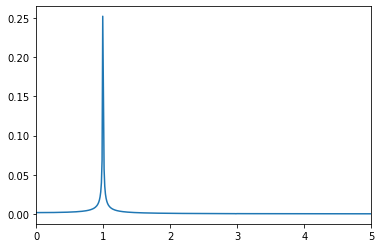

In [61]:
freq, y_fft = make_fft(t, Y)

plt.plot(freq, y_fft)
plt.xlim(0,5)

fs   = 1 / (t[1]-t[0])
NFFT = 1*fs

Pxx, freqs = mlab.psd(Y, Fs = fs)

(-3, 3)

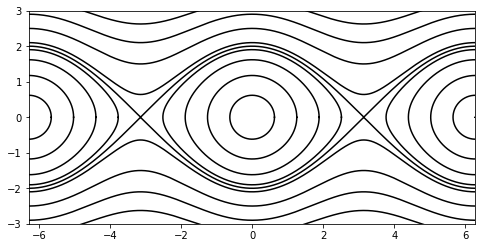

In [186]:
a  = -1     # g/l dans le cas du pendule
f  = 0      # frottements

plt.figure(figsize=(8,6))
sps = (1,1)
ax = plt.subplot2grid(sps, (0,0))

def equation(Y,t):
    (y,dy)=Y
    return [dy,a*sin(y)+f*dy]

def solver(CI, periods=10):
    t = np.linspace(0, 2*np.pi*periods,10000)
    Y, dY = odeint(equation, CI, t).T
    return Y, dY, t

def plot_ci(ci, ax, periods=10):
    Y, dY, t = solver(ci, periods=periods)
    ax.plot(Y, dY, "k")
    ax.set_aspect("equal")

for theta0 in np.array([-1,0,1])*2*np.pi:
    for theta1 in np.linspace(0,np.pi, 6):
        CI = [theta0+theta1, 0]
        Y,_, t = solver(CI, periods=5)
        for time, y in zip(t, Y):
            eps = np.abs(y-CI[0])
            if time < 2*np.pi:
                threshold = eps
                pass
            elif eps < threshold:
                threshold = eps
                pass
            else:
                break
        period = time/(2*np.pi)
        plot_ci(CI, ax, periods=period)

plot_ci([-2*np.pi, 2.00001], ax)
plot_ci([2*np.pi, -2.00001], ax)

for theta0 in [-2*np.pi, 2*np.pi]:
    for dtheta in [0.1,0.5, 0.9, 1.3]:
        CI = [theta0, -np.sign(theta0)*(2+dtheta)]
        plot_ci(CI, ax, periods=2)



ax.set_xlim(-2*np.pi, 2*np.pi)
ax.set_ylim(-3, 3)

138.50549999999998
139.083


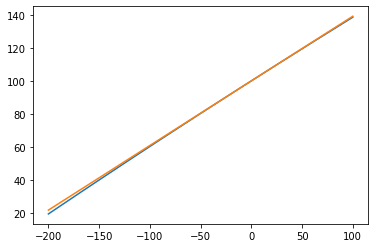

In [193]:
theta = np.linspace(-200, 100, 1000)

plt.plot(theta, 100*(1+3.9083e-3*theta-5.775e-7*theta**2))
plt.plot(theta, 100*(1+3.9083e-3*theta))

theta=100

print(100*(1+3.9083e-3*theta-5.775e-7*theta**2))
print(100*(1+3.9083e-3*theta))

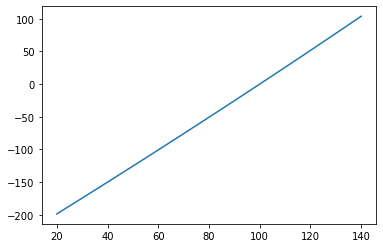

In [199]:
r = np.linspace(20, 140)

a=-3.9083e-3
b = -5.7750e-7

def temperature(r):
    return (a+np.sqrt(a**2-4*b*(1-r/100)))/2/b

plt.plot(r, temperature(r))

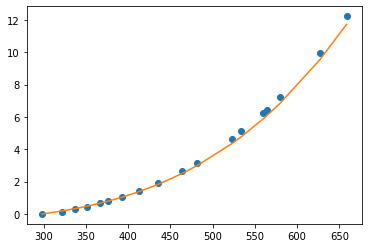

In [231]:
T = 273+np.array([25.3, 49.3, 64.1, 78.1, 93.8, 103.8, 120.2, 139.8, 163.0, 190.7, 208.5, 250.4, 260.8, 286.5, 290.9, 306.8, 353.7, 385.6])
V = np.array([-0.0, 0.132, 0.285, 0.448, 0.66, 0.81, 1.07, 1.43, 1.92, 2.64, 3.15, 4.64, 5.1, 6.23, 6.43, 7.223, 9.96, 12.22])

plt.plot(T,V, "o")
plt.plot(T, 0.65e-10*(T**4-T[0]**4))
#plt.plot(T, 4e-9*(T-T[0])**4)

#plt.plot(T, 7.5e-5*(T**2-T[0]**2))